In [1]:
import warnings
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import tensorflow as tf

In [61]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [62]:
import seaborn as sns

In [71]:
warnings.filterwarnings("ignore")
tf.get_logger().setLevel('ERROR')

## Data Analysis


In [72]:
from dataset import suny_international
df=suny_international.load_data()

In [73]:
print(*df.index.year.unique())

2013 2012 2011 2010


The data exists for 4 years. We take the first three years as the training data and the fourth year as the testing data

<BarContainer object of 24 artists>

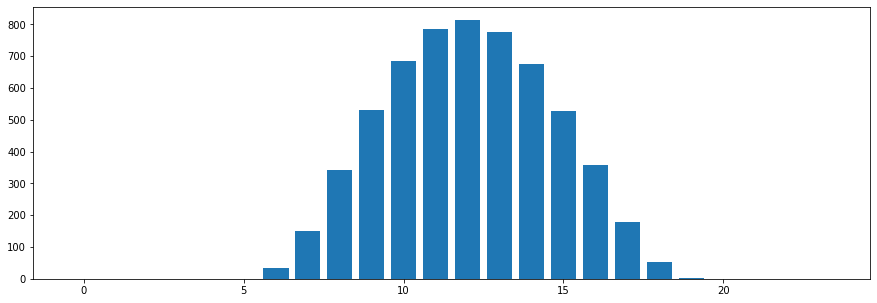

In [77]:
ghi=df['GHI']
hourly = ghi.groupby(ghi.index.hour).mean()
plt.bar(hourly.index,hourly)

<b>Hourly Averages for solar power<b> 

We can easily see that the hourly averages follow a kind of inverted parabola with the the daily maximum at around 12:00 and the power flattens out befor 5:30 and after 19:30

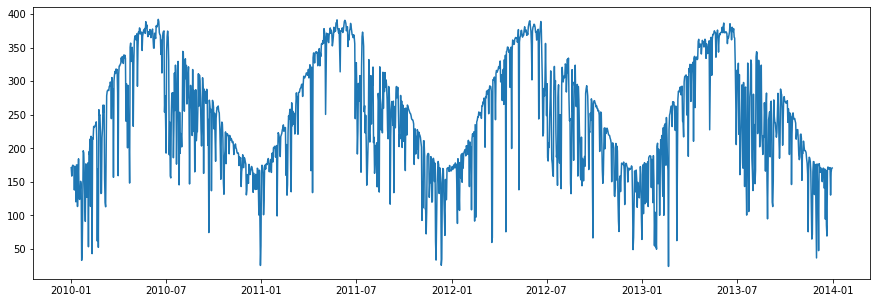

In [78]:
daily = ghi.groupby(pd.Grouper(freq="D")).mean()
plt.plot(daily.index,daily)

<b>Daily Averages for solar power<b> 

We can easily see that the daily averages follow a kind of sinusodial pattern throught the years. Still there is considerable variation in the daily average

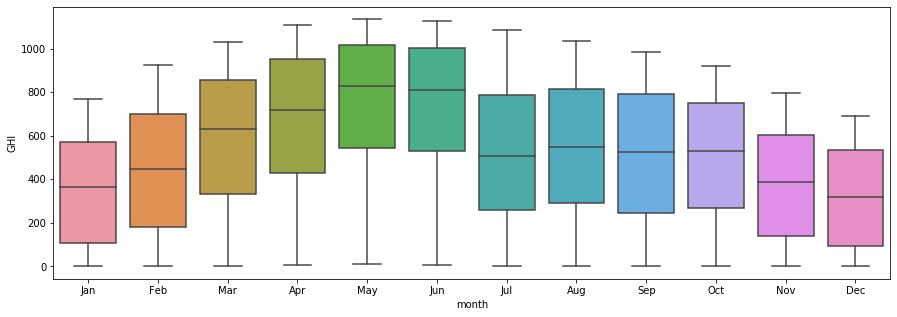

In [81]:
df['month'] = [d.strftime('%b') for d in df.index.date]
sns.boxplot(x='month', y='GHI', data=df[(df.index.hour>6) & (df.index.hour<18) ])

## Decomposition
Time series decomposition involves thinking of a series as a combination of level, trend, seasonality, and noise components. 
Decomposition provides a useful abstract model for thinking about time series generally and for better understanding problems during time series analysis and forecasting.
1. <b>Trend</b>: The increasing or decreasing value in the series.
2. <b>Seasonality</b>: The repeating short-term cycle in the series.
3. <b>Noise</b>: The random variation in the series.


The additive model suggests that the components are added together as follows:


`y(t) = Trend + Seasonality + Noise`

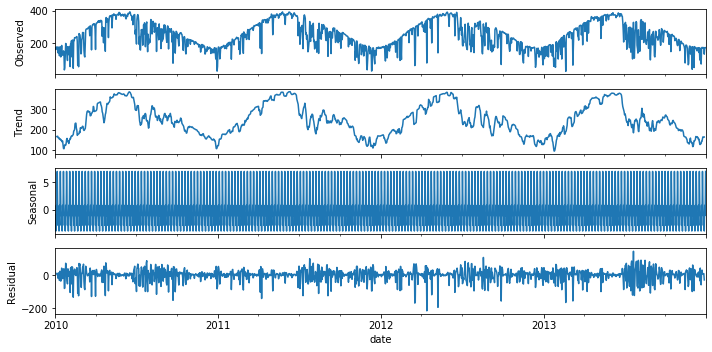

In [58]:
import statsmodels.api as sm
y = df.resample('D').mean()
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

1. <b>Trend</b>: This comes out to be the yearly variation in the data. Notice that the data follows nearly a sinusodial distribution from January being the minima and May being the Maxima  
2. <b>Seasonality</b>: The repeating daily cycle from 6AM to 6PM is captured as the seasonal cycle.
3. <b>Noise</b>: The random noise apart from the above two. The cause can be cloud cover, rain etc.